# DSS demonstration
Access to notebook: https://github.com/H2020-IPM-openalea/DSS/blob/refactor/example/DSS_demonstration.ipynb

In [1]:
import pandas
pandas.set_option('display.max_colwidth', None)
pandas.set_option('display.max_row', 10)
import numpy as np
from weatherdata.ipm import WeatherDataHub
from openalea.dss import Hub
from docstring_parser import parse
import sys

# Acces to IPM DSS from OpenAlea python

## 1. Access to dss catalog 

In [3]:
h = Hub()
h.display()


,dss,models,pests,crops,description
0,no.nibio.vips,PSILARTEMP,[PSILRO],[DAUCS],"THE PEST: The first generation of adult carrot fly emerge from pupae in the soil in the spring, and lay eggs close to the base of vulnerable crops. Larvae \ninitial feed at the surface, then tunnel into the tap root. Adults emerge mid-July and can lead to a second generation. \nTHE DECISION: Treatments may need to be applied soon after adults arrive in the crop, before larvae tunnel into the crop roots. \nTHE MODEL: The model determines the start of the flight period for the 1st generation of carrot rust fly based on accumuleted degree-days (260 day-degrees) over a base temperature of 5°C. \nTHE PARAMETERS: The model uses daily air temperature \nSOURCE: Luke, Finland. \nASSUMPTIONS: Be aware that in areas with field covers (plastic, single or double non-woven covers, etc.) with early crops the preceding season (either on the current field or neighboring fields), the flight period can start earlier than predicted due to higher soil temperature under the covers.\nREFERENCE: Marjjula et al 2000\n"
1,no.nibio.vips,DELIARADIC,[HYLERA],[1BRSG],"THE PEST: Cabbage root fly larvae feed on the roots of brassicas, with damage being dependant on the crop type, growth stage and growing conditions. The cabbage root fly adults begin to lay eggs 5-7 days after emergence. Newly transplanted or recently emerged crops are most at risk as the root systems are less developed. \nTHE DECISION: Treatments may need to be applied soon after adults arrive in the crop, before subsequent larvae tunnel into the crop roots. \nTHE MODEL: The model determins the start of egg laying as 160 degree-days (day-degrees) based on soil temperature (10 cm), over a base of temperature of 4 °C), OR based on the standard air temperature (2 m above the soil surface) at the same locations, egg laying starts at 210 degree days. \nTHE PARAMETERS: The model uses Daily soil OR air temperature \nSOURCE: NIBIO, Norway. \nASSUMPTIONS: Be aware that in areas with field covers (plastic, single or double non-woven covers, etc.) with early crops the preceding season (either on the current field or neighboring fields), the flight period can start earlier due to higher soil temperature under the covers. This model should be used in combination with direct observations of eggs in the field. This is due to large variability and to get an idea of the severity of attack. The model only applies for cabbage fly, not turnip fly.\n"
2,no.nibio.vips,MAMESTRABR,[BARABR],[1BRSG],"The model for the warning system for cabbage moth was developed by Dr. Nina Svae Johansen. \nIt is based on the minimum temperature threshold and the requirement for accumulated \nday-degrees for the different stages of the cabbage moth [CITATION Joh96 \t \l 1044 ]. \nThe accumulated degree-day model calculates forecasts for development of the cabbage moth \nthrough the summer, generates warnings for the time when eggs and small larvae can be \nregistered in the field and the best time for treatment [CITATION Joh97 \t \l 1044 ].\n\nNote that the model is based on temperature, it is not related to the presence or \nabsence of cabbage moth in the field. Thus, it is important to evaluate the situation in the field.\n\nSOURCE: \nASSUMPTIONS: \nREFERENCE:"
3,no.nibio.vips,PSILAROBSE,[PSILRO],[DAUCS],"The warning system model is based on weekly observations of adult carrot rust flies captured on yellow sticky traps. The model is based in its entirety on observations, with no input of weather data or weather forecasts. Traps are placed in the field edge and in the field and are examined for carrot rust flies weekly throughout the season. The number of adult carrot rust flies is registered in VIPS and is used in the warning system model. The observations are compared with the economic threshold levels and a warning is calculated. After organophosphates (which had a good effect against larvae) were removed from the market, they were replaced by pyret

## 2. Select dss, meta-informations 

### 2.1 select dss and model

In [5]:
psitemp=h.get(dss="no.nibio.vips", model="PSILARTEMP")

### 2.2 display meta-information of dss model

In [6]:
psitemp.informations("dataframe")


,name,id,description,type_of_decision,pests,crops,weather input,field_observation input,output,output_description
0,Carrot rust fly temperature model,PSILARTEMP,"THE PEST: The first generation of adult carrot fly emerge from pupae in the soil in the spring, and lay eggs close to the base of vulnerable crops. Larvae \ninitial feed at the surface, then tunnel into the tap root. Adults emerge mid-July and can lead to a second generation. \nTHE DECISION: Treatments may need to be applied soon after adults arrive in the crop, before larvae tunnel into the crop roots. \nTHE MODEL: The model determines the start of the flight period for the 1st generation of carrot rust fly based on accumuleted degree-days (260 day-degrees) over a base temperature of 5°C. \nTHE PARAMETERS: The model uses daily air temperature \nSOURCE: Luke, Finland. \nASSUMPTIONS: Be aware that in areas with field covers (plastic, single or double non-woven covers, etc.) with early crops the preceding season (either on the current field or neighboring fields), the flight period can start earlier than predicted due to higher soil temperature under the covers.\nREFERENCE: Marjjula et al 2000\n",Short-term tactical,[PSILRO],[DAUCS],1002,None,"TMDD5C, THRESHOLD_1, THRESHOLD_2, THRESHOLD_3","Accumulated day degrees, Threshold for start of flight period, Threshold for peak flight period, Threshold for end of 1st generation flight period"


### 2.3 import IPM weatherdata or local OpenAlea ressouce from local IPM catalog

In [8]:
ws=WeatherDataHub()
slu=ws.get_ressource(name="SLU Lantmet service")

weather=slu.data(parameters=[1002],latitude=[67.28],longitude=[14.37],
                 timeStart='2021-06-01',timeEnd="2021-08-20",timeZone="Europe/Paris",
                 display="json")

In [9]:
#weather

### 2.4 Run model and vizualise

* run model

In [10]:
ds=psitemp.run(weatherdata=weather)
ds

<xarray.Dataset>
Dimensions:      (time: 81)
Coordinates:
  * time         (time) datetime64[ns] 2021-05-30 2021-05-31 ... 2021-08-18
Data variables:
    TMDD5C       (time) float64 0.67 1.87 8.15 17.6 ... 505.1 509.6 516.1 520.5
    THRESHOLD_1  (time) float64 260.0 260.0 260.0 260.0 ... 260.0 260.0 260.0
    THRESHOLD_2  (time) float64 360.0 360.0 360.0 360.0 ... 360.0 360.0 360.0
    THRESHOLD_3  (time) float64 560.0 560.0 560.0 560.0 ... 560.0 560.0 560.0
Attributes:
    name:             Carrot rust fly temperature model
    id:               PSILARTEMP
    version:          1.0
    authors:          {'name': 'Berit Nordskog', 'email': 'berit.nordskog@nib...
    description:      THE PEST: The first generation of adult carrot fly emer...
    description_url:  https://www.vips-landbruk.no/forecasts/models/PSILARTEMP/

* plot output

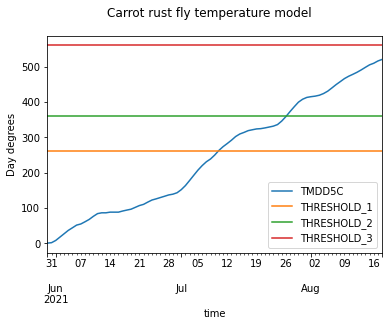

In [11]:
psitemp.plot(ds)

## Example with field observation 

In [ ]:
psiobs=h.get(dss="no.nibio.vips", model="PSILAROBSE")


* import fieldObservation 

In [ ]:
fieldobs=psiobs.df_reader_fieldObservation(path='C:/Users/mlabadie/Documents/GitHub/dss/example/psilarobs.csv',
                                           longitude=11.025635, 
                                           latitude=59.715791, 
                                           timeZone="Europe/Paris",
                                           sep=";", dayfirst=True,
                                           pestEPPOCode="SEPTAP",
                                           cropEPPOCode="APUGD", 
                                           convert_name=None)
fieldobs

In [ ]:
ds=psiobs.run(fieldObservation=fieldobs,view="Json")
ds

In [ ]:
psiobs.plot(ds)